In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn import metrics

In [ ]:
data_path="/content/drive/MyDrive/deep learning/cell_images"

In [ ]:

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary',
    subset='validation'
)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)

feature_extractor = Model(inputs=vgg16_model.input, outputs=x)

train_features = feature_extractor.predict(train_generator)
val_features = feature_extractor.predict(val_generator)

63/63 [==============================] - 587s 9s/step


In [ ]:
for layer in vgg16_model.layers:
    layer.trainable = False

In [ ]:
train_features

array([[0.26678035, 0.        , 0.5703037 , ..., 0.00877599, 0.82768404,
        0.        ],
       [0.47779173, 0.        , 0.47717106, ..., 0.00396044, 0.87571514,
        0.00307704],
       [0.12835549, 0.        , 0.30518392, ..., 0.02510432, 0.8253031 ,
        0.        ],
       ...,
       [0.15597352, 0.        , 0.25161514, ..., 0.        , 0.72944164,
        0.        ],
       [0.20178452, 0.        , 0.37891224, ..., 0.03257485, 1.0008162 ,
        0.        ],
       [0.15874064, 0.        , 0.2800203 , ..., 0.00752704, 0.6269018 ,
        0.        ]], dtype=float32)

In [ ]:
val_features

array([[0.17765903, 0.        , 0.41819417, ..., 0.00750183, 0.7773569 ,
        0.        ],
       [0.26353887, 0.        , 0.35198453, ..., 0.00553023, 1.0206121 ,
        0.        ],
       [0.13217327, 0.        , 0.20862123, ..., 0.00300297, 0.9253995 ,
        0.        ],
       ...,
       [0.33945322, 0.        , 0.5323881 , ..., 0.01093184, 0.91169715,
        0.        ],
       [0.18386674, 0.        , 0.5001666 , ..., 0.01949322, 1.0397469 ,
        0.        ],
       [0.23062134, 0.        , 0.45017508, ..., 0.01496867, 0.8605365 ,
        0.03025717]], dtype=float32)

1/1 [==============================] - 1s 624ms/step


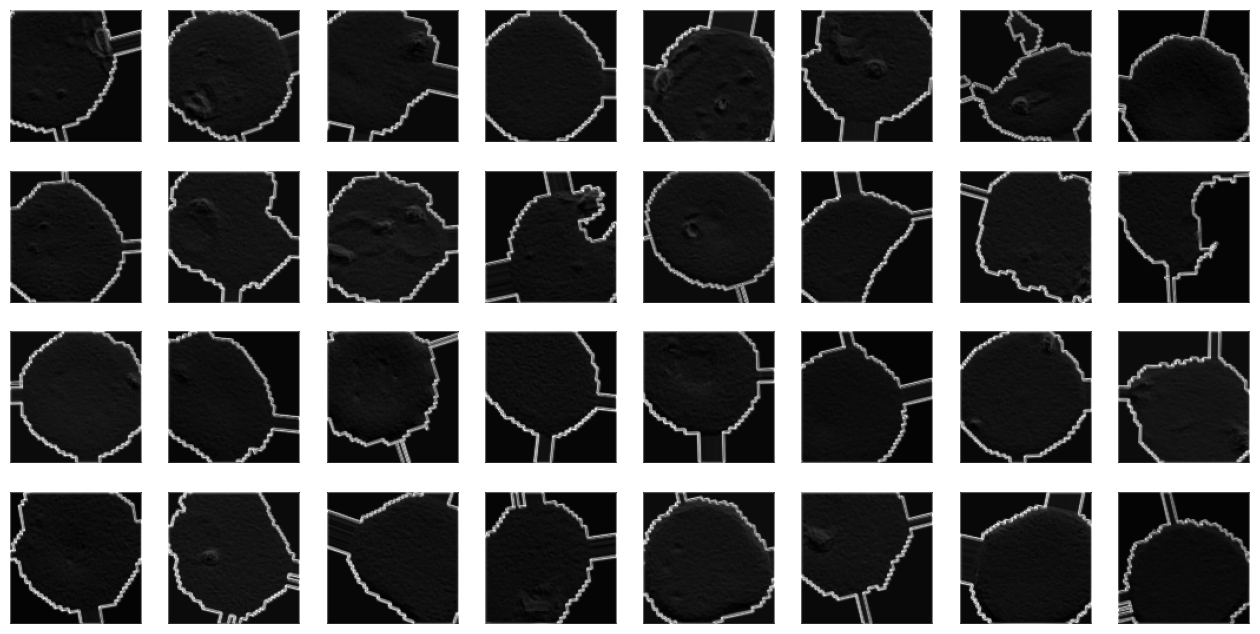

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a new feature extractor that only includes the first convolutional layer
edge_detector = Model(inputs=vgg16_model.input, outputs=vgg16_model.get_layer('block2_conv1').output)

# Get a batch of images from the validation set
x_batch, y_batch = next(train_generator)

# Extract features from the batch of images using the edge detector
edge_maps_batch = edge_detector.predict(x_batch)

# Plot the edge maps as a heatmap
fig, axs = plt.subplots(4, 8, figsize=(16, 8))
axs = axs.ravel()

for i in range(32):
    edge_map = edge_maps_batch[i]
    axs[i].imshow(np.abs(edge_map).max(axis=-1), cmap='gray')
    axs[i].axis('off')

plt.show()


1/1 [==============================] - 1s 941ms/step


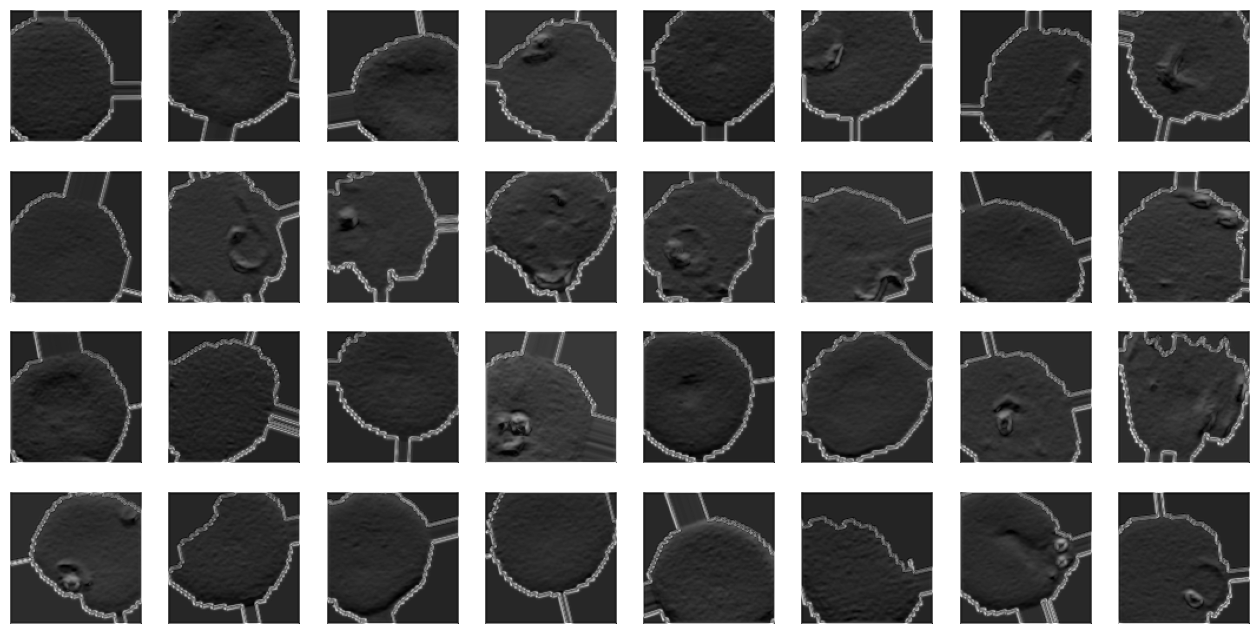

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a new feature extractor that only includes the first convolutional layer
edge_detector = Model(inputs=vgg16_model.input, outputs=vgg16_model.get_layer('block2_conv2').output)

# Get a batch of images from the validation set
x_batch, y_batch = next(train_generator)

# Extract features from the batch of images using the edge detector
edge_maps_batch = edge_detector.predict(x_batch)

# Plot the edge maps as a heatmap
fig, axs = plt.subplots(4, 8, figsize=(16, 8))
axs = axs.ravel()

for i in range(32):
    edge_map = edge_maps_batch[i]
    axs[i].imshow(np.abs(edge_map).max(axis=-1), cmap='gray')
    axs[i].axis('off')

plt.show()


1/1 [==============================] - 1s 1s/step


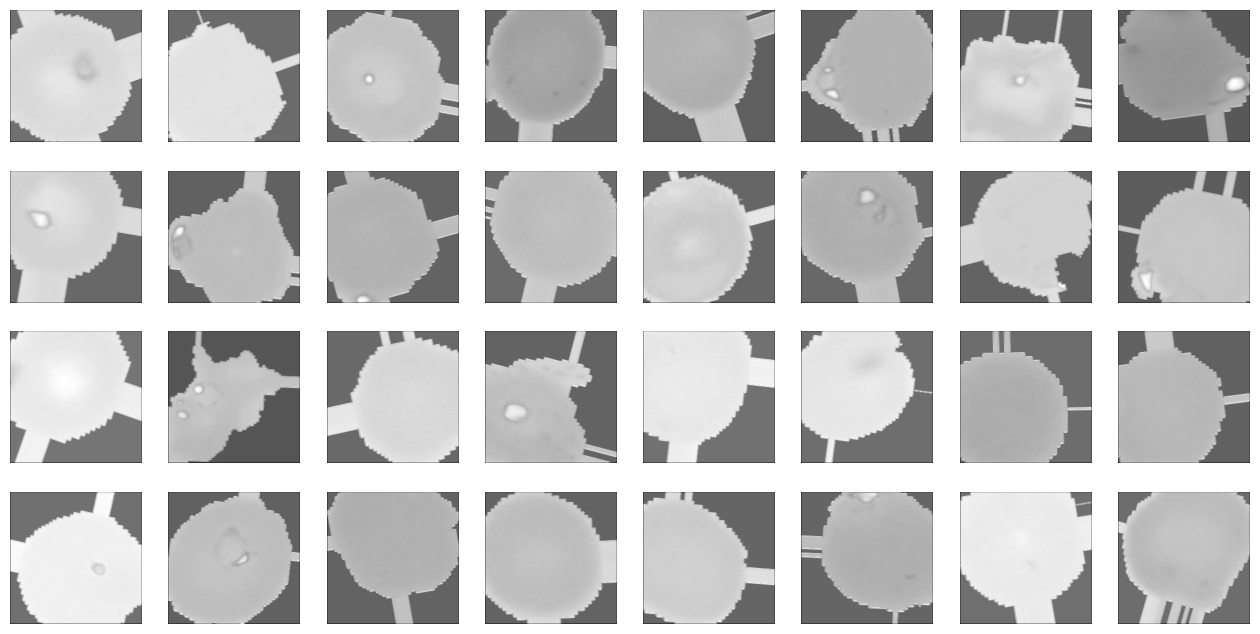

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a new feature extractor that only includes the first convolutional layer
edge_detector = Model(inputs=vgg16_model.input, outputs=vgg16_model.get_layer('block1_conv2').output)

# Get a batch of images from the validation set
x_batch, y_batch = next(train_generator)

# Extract features from the batch of images using the edge detector
edge_maps_batch = edge_detector.predict(x_batch)

# Plot the edge maps as a heatmap
fig, axs = plt.subplots(4, 8, figsize=(16, 8))
axs = axs.ravel()

for i in range(32):
    edge_map = edge_maps_batch[i]
    axs[i].imshow(np.abs(edge_map).max(axis=-1), cmap='gray')
    axs[i].axis('off')

plt.show()


1/1 [==============================] - 1s 871ms/step


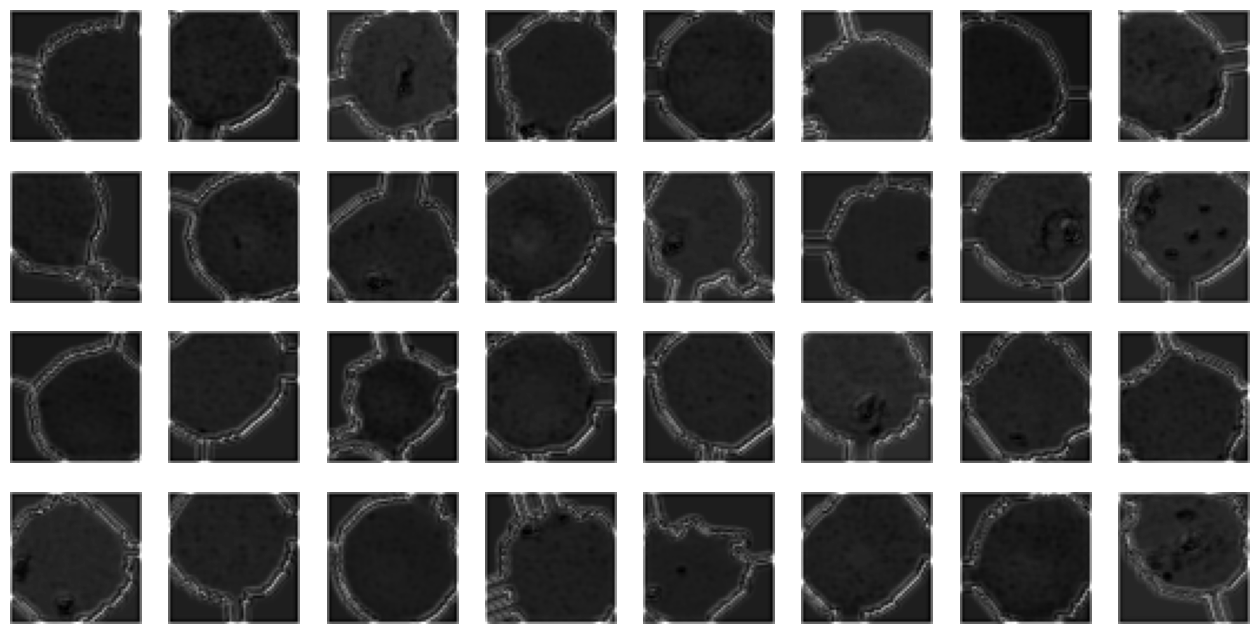

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a new feature extractor that only includes the first convolutional layer
edge_detector = Model(inputs=vgg16_model.input, outputs=vgg16_model.get_layer('block3_conv2').output)

# Get a batch of images from the validation set
x_batch, y_batch = next(train_generator)

# Extract features from the batch of images using the edge detector
edge_maps_batch = edge_detector.predict(x_batch)

# Plot the edge maps as a heatmap
fig, axs = plt.subplots(4, 8, figsize=(16, 8))
axs = axs.ravel()

for i in range(32):
    edge_map = edge_maps_batch[i]
    axs[i].imshow(np.abs(edge_map).max(axis=-1), cmap='gray')
    axs[i].axis('off')

plt.show()


In [ ]:
train_labels = train_generator.classes
val_labels = val_generator.classes

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# Define a new model that includes the VGG-16 base model and a new fully connected layer
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(1, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training set and evaluate it on the validation set
history = model.fit(val_generator, steps_per_epoch=train_generator.samples // 32,
                              epochs=15, validation_data=val_generator, validation_steps=val_generator.samples // 32)


Epoch 1/15
 63/250 [======>.......................] - ETA: 1:28 - loss: 0.6932 - accuracy: 0.4990

250/250 [==============================] - 73s 285ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.4995


In [ ]:
# create a new model object
x = Flatten()(vgg16_model.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg16_model.input, outputs=prediction)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# print the model summary
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [ ]:
h = model.fit(val_generator, steps_per_epoch=50,
                              epochs=15, validation_data=val_generator, validation_steps=val_generator.samples //32)

Epoch 1/15
 32/125 [======>.......................] - ETA: 1:26 - loss: 0.6932 - accuracy: 0.4920

KeyboardInterrupt: ignored

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               6422784   
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
svm = SVC(kernel='linear', C=1, gamma='auto')
svm.fit(train_features, train_labels)

# Evaluate the classifier on the validation set
val_pred = svm.predict(val_features)
print(confusion_matrix(val_labels, val_pred))
print(classification_report(val_labels, val_pred))


[[481 519]
 [477 523]]
              precision    recall  f1-score   support

           0       0.50      0.48      0.49      1000
           1       0.50      0.52      0.51      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



In [ ]:
steps_per_epoch=train_generator.samples/32

In [ ]:
steps_per_epoch

250.0

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier 

model_knn = KNeighborsClassifier(n_neighbors=10) 
model_knn.fit(train_features, train_labels)
y_prediction_knn = model_knn.predict(val_features) 


score_knn = metrics.accuracy_score(y_prediction_knn,val_labels)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")


----------------------------------
The accuracy of the KNN is: 0.52
----------------------------------
